# ipl project

In [6]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [7]:
matches_df = pd.read_csv('matches.csv')



In [46]:
matches_df


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [41]:
print(matches_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [11]:
matches_df["umpire3"].isnull().sum()


637

In [43]:
matches_df["umpire3"].unique()

array([nan, 'Anil Chaudhary', 'Nitin Menon', 'S Ravi', 'O Nandan',
       'A Nanda Kishore', 'Vineet Kulkarni', 'C Shamshuddin',
       'Rod Tucker', 'Chris Gaffaney', 'A.D Deshmukh', 'Nigel Llong',
       'K Ananthapadmanabhan', 'Anil Dandekar', 'Virender Kumar Sharma',
       'Yeshwant Barde', 'Bruce Oxenford', 'Marais Erasmus',
       'Kumar Dharmasena', 'KN Anantapadmanabhan', 'Ulhas Gandhe',
       'Nanda Kishore', 'Ian Gould', 'Sundaram Ravi',
       'KN Ananthapadmanabhan', 'Chettithody Shamshuddin'], dtype=object)

In [45]:
matches_df["umpire3"].all

<bound method NDFrame._add_numeric_operations.<locals>.all of 0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
                ...           
751                     S Ravi
752                  Ian Gould
753                        NaN
754    Chettithody Shamshuddin
755                Nigel Llong
Name: umpire3, Length: 756, dtype: object>

In [12]:
matches_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [13]:
matches_df["umpire3"].tail(10)

746              Nanda Kishore
747      KN Ananthapadmanabhan
748                Nitin Menon
749               Ulhas Gandhe
750             Bruce Oxenford
751                     S Ravi
752                  Ian Gould
753                        NaN
754    Chettithody Shamshuddin
755                Nigel Llong
Name: umpire3, dtype: object

In [14]:
matches_df.describe()


,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [15]:
matches_df['id'].max()


11415

In [16]:
matches_df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [17]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [18]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [19]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [20]:
matches_df.iloc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

In [21]:
matches_df.iloc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

In [22]:
matches_df.iloc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

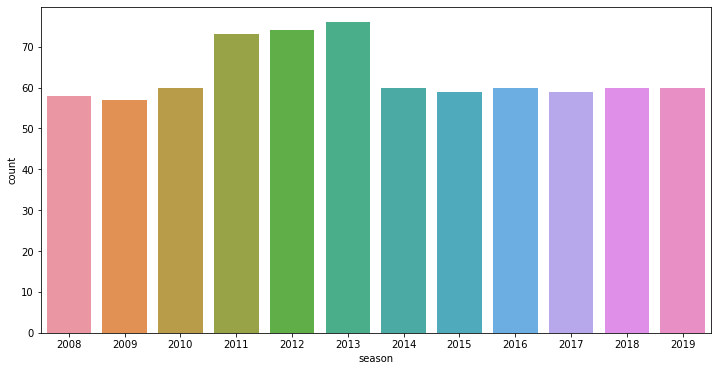

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', data=matches_df)
plt.show()

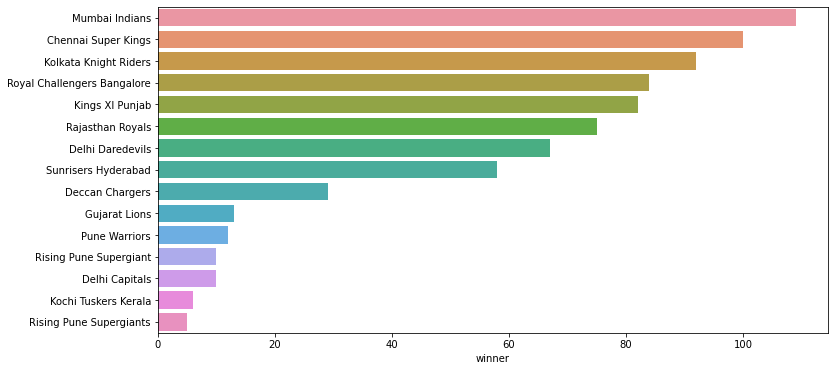

In [24]:
plt.figure(figsize=(12,6))
data = matches_df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.show()

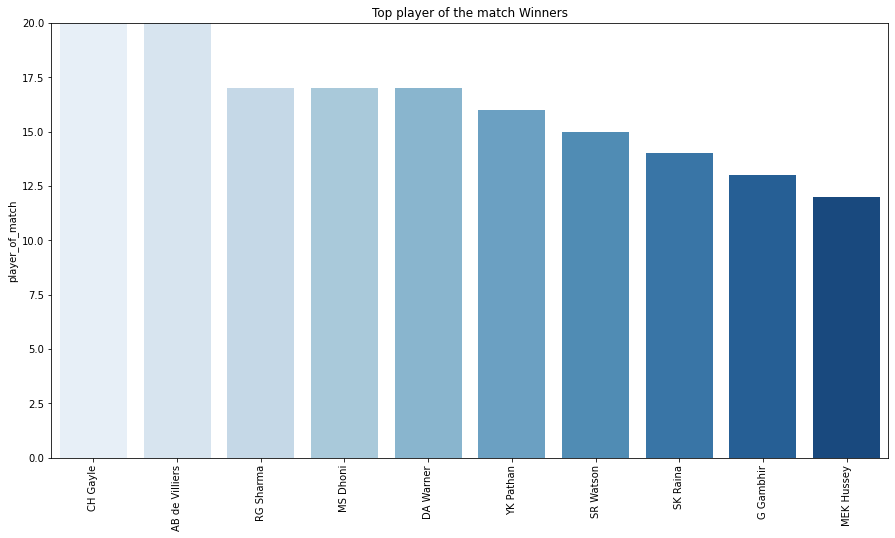

In [25]:
top_players = matches_df.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=df)
fig, ax = plt.subplots(figsize=(15,8))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Blues");
plt.show()

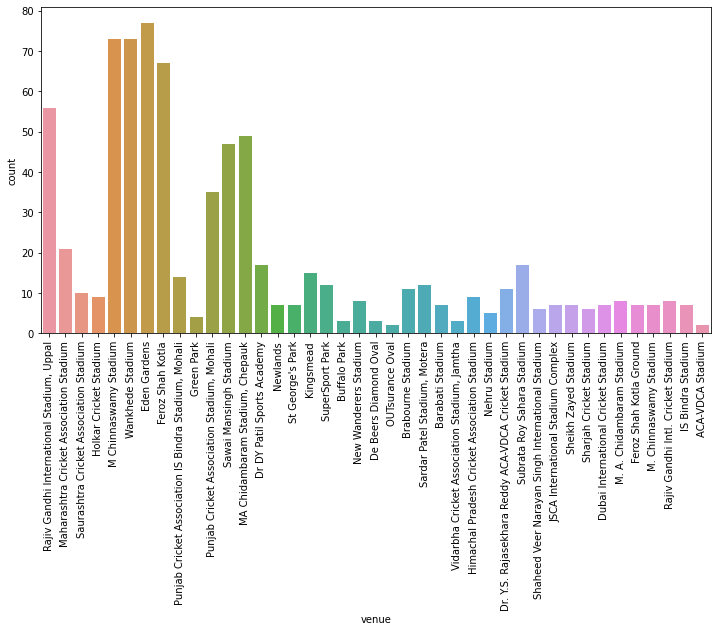

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

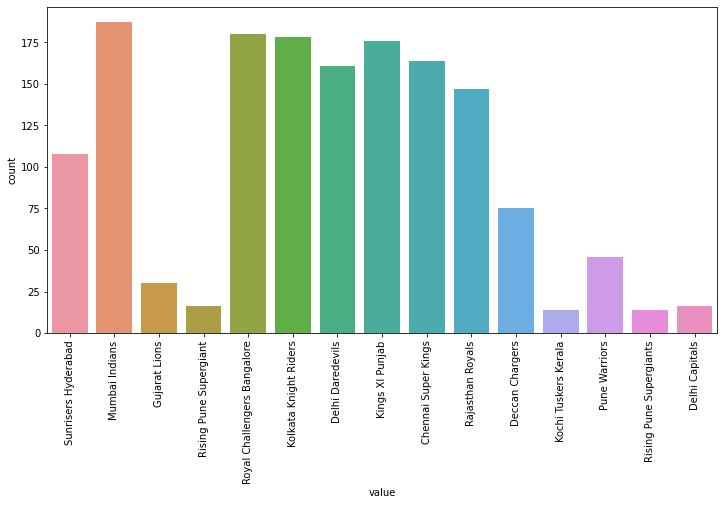

In [27]:
temp_df = pd.melt(matches_df, id_vars=['id','season'], value_vars=['team1', 'team2'])

plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

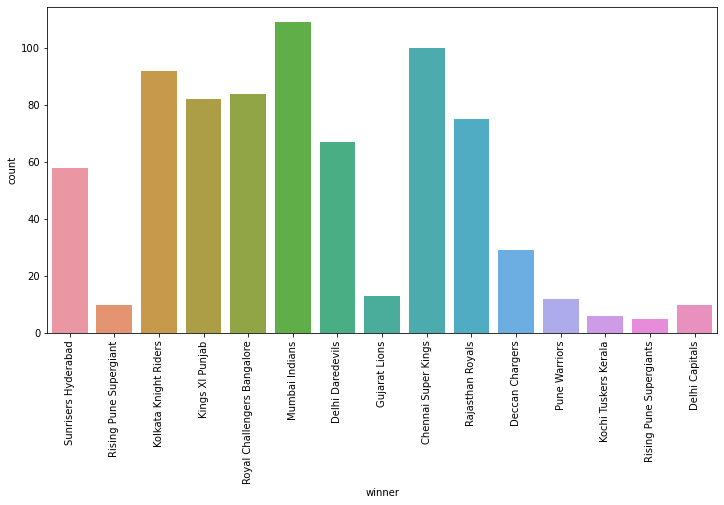

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=matches_df)
plt.xticks(rotation=90)
plt.show()

In [29]:
temp_df = matches_df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


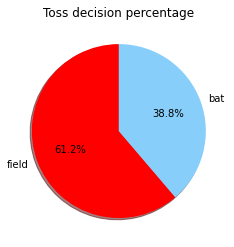

In [48]:
temp_series = matches_df.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['red', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()
          

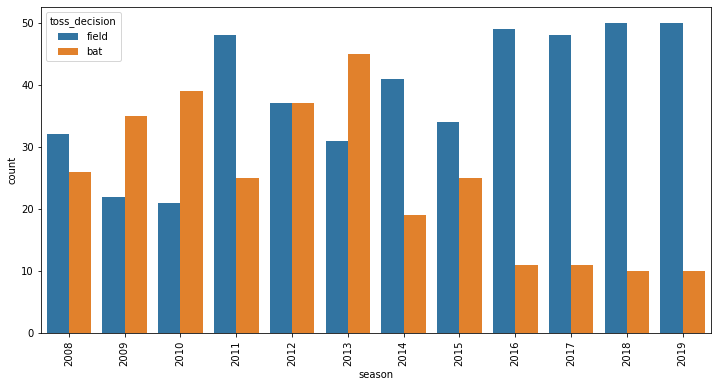

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

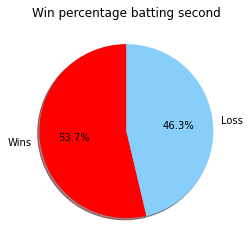

In [47]:
# Since there is a very strong trend towards batting second let us see the win percentage of teams batting second.
num_of_wins = (matches_df.win_by_wickets>0).sum()
num_of_loss = (matches_df.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['red', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

In [38]:
# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')
        

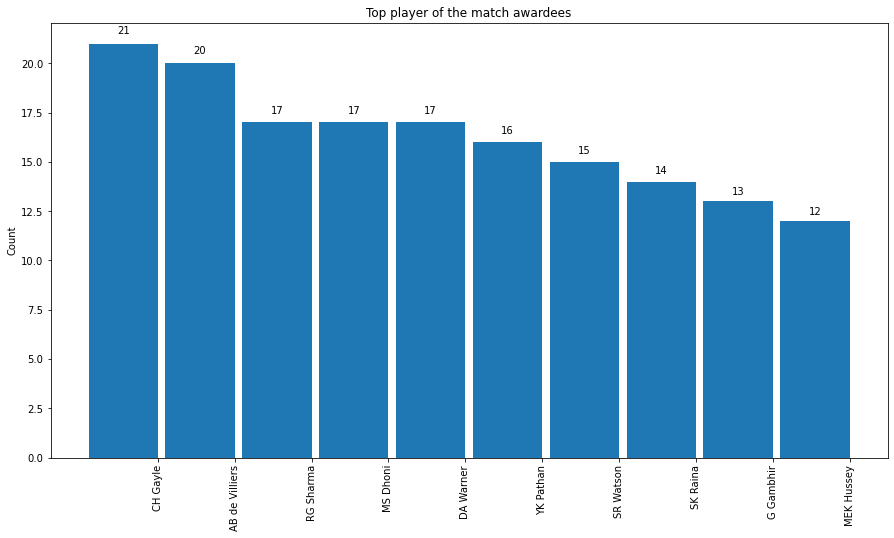

In [39]:
temp_series = matches_df.player_of_match.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_series), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
autolabel(rects)
plt.show()